In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
plt.rcParams['font.family'] = 'tahoma'

## มิติที่ 2 เวลา
วิเคราะห์การใช้งานนโยบาย OP anywhere ในกรุงเทพมหานครทั้งสองแบบในช่วงเวลา

In [2]:
time_zone =  pd.read_csv('time_zone.csv')
time_cup = pd.read_csv('time_cup.csv')
time_total = pd.read_csv('time_total.csv')

In [3]:
time_total

,yearmonth,timezone
0,256501,129
1,256502,101
2,256503,154
3,256504,211
4,256505,6817
5,256506,33445
6,256507,23374
7,256508,10493
8,256509,4644
9,256510,5755


In [4]:
#cross-column time_zone x time_cup x time_total
merged_df = pd.merge(time_zone, time_cup, on='yearmonth')
#merged_df = pd.merge(merged_df, time_total, on='yearmonth')
#merged_df = merged_df.rename(columns={'timezone_y': 'timetotal'})
#merged_df


In [5]:
merged_df

,yearmonth,timezone,timecup
0,256501,109,20
1,256502,99,2
2,256503,144,10
3,256504,183,28
4,256505,278,6539
5,256506,668,32777
6,256507,1657,21717
7,256508,2947,7546
8,256509,4327,317
9,256510,5750,5


In [6]:
sumz = time_zone['timezone'].sum()
sumz

81078

In [7]:
sumx = time_cup['timecup'].sum()
sumx

76245

In [8]:
81078+76245

157323

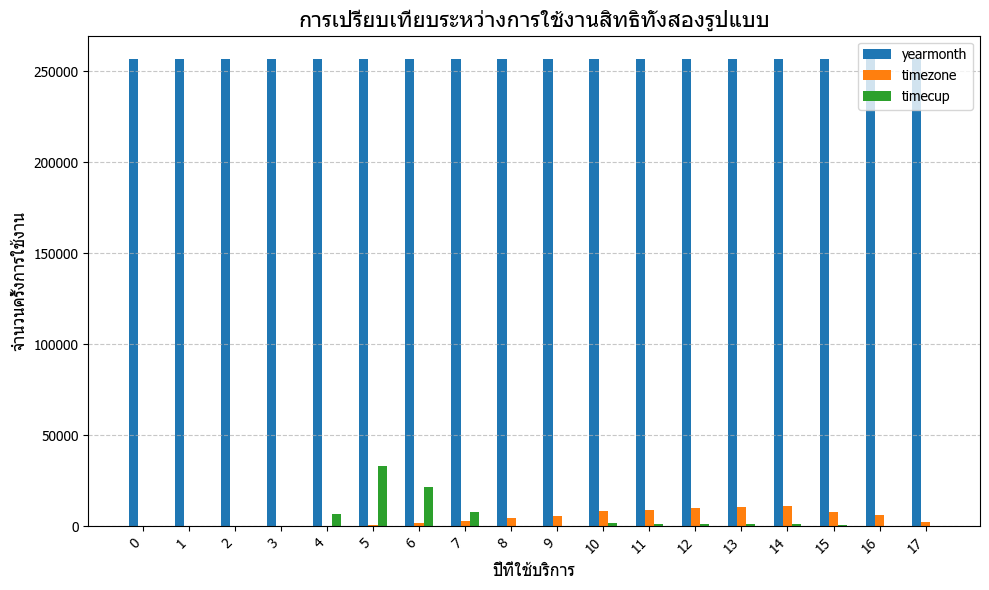

In [9]:
# Get the column names excluding the 'Category' column
column_names = merged_df.columns.tolist()

# Set the width for each bar in the clustered column chart
bar_width = 0.2

# Calculate the positions of bars for each group
positions = range(len(merged_df.index))

# Define colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Plot the clustered column chart
fig, ax = plt.subplots(figsize=(10, 6))
for i, col_name in enumerate(column_names):
    ax.bar([p + i * bar_width for p in positions], merged_df[col_name], width=bar_width, label=col_name, color=colors[i])

# Set the x-axis ticks and labels with rotation
ax.set_xticks([p + bar_width for p in positions])
ax.set_xticklabels(merged_df.index, rotation=45, ha='right')

# Set the chart title and labels
plt.title('การเปรียบเทียบระหว่างการใช้งานสิทธิทั้งสองรูปแบบ', fontsize=16)
plt.xlabel('ปีที่ใช้บริการ', fontsize=12)
plt.ylabel('จำนวนครั้งการใช้งาน', fontsize=12)

# Add gridlines to the plot
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the legend
plt.legend(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

ทำไมในช่วงปี 2565 เดือน พ.ค. - ส.ค. ถึงมีจำนวนการใช้งานแบบข้าม CUP เยอะมากเป็นพิเศษ ?

In [10]:
time_outline = pd.read_csv('time_outline.csv')
time_outline

,yearmonth,hosname,amprhcode,ampr_nb,hnamehos,ampr_main_nb,timecup
0,256506,คลินิกเวชกรรมแพทย์อ่อนนุช 44,เขตสวนหลวง,34,ศูนย์บริการสาธารณสุข37 ประสงค์ -สุดสาคร,34,17
1,256506,ธรรมพิชญาคลินิกเวชกรรม สาขาบึงกุ่ม,เขตบึงกุ่ม,27,รพ.ทั่วไปขนาดใหญ่แพทย์ปัญญา,34,2
2,256506,ธรรมพิชญาคลินิกเวชกรรม สาขาบึงกุ่ม,เขตบึงกุ่ม,27,รพ.นพรัตนราชธานี,43,4
3,256506,ธรรมพิชญาคลินิกเวชกรรม สาขาบึงกุ่ม,เขตบึงกุ่ม,27,รพ.เพชรเวชโรงพยาบาลทั่วไปขนาดใหญ่,17,5
4,256506,ธรรมพิชญาคลินิกเวชกรรม สาขาบึงกุ่ม,เขตบึงกุ่ม,27,ศูนย์บริการสาธารณสุข35 หัวหมาก,6,2
...,...,...,...,...,...,...,...
1308,256507,อยู่ดีมีสุขคลินิกเวชกรรม,เขตสาทร,28,รพ.บางบัวทอง,4,2
1309,256507,เกียรติการแพทย์คลินิกเวชกรรม สาขาจันทรเกษม,เขตจตุจักร,30,รพ.คลองหลวง,2,18
1310,256507,เกียรติการแพทย์คลินิกเวชกรรม สาขาจันทรเกษม,เขตจตุจักร,30,รพ.มงกุฎวัฒนะ,41,3
1311,256507,เกียรติการแพทย์คลินิกเวชกรรม สาขาจันทรเกษม,เขตจตุจักร,30,รักษ์สุขคลินิกเวชกรรม(สาขาฟ้าคราม),6,2


In [11]:
# คู่ค่า key-value สำหรับแปลงค่าใหม่
hmain_name_mapping = {
    1: 'เขตพระนคร',
    2: 'เขตดุสิต',
    3: 'เขตหนองจอก',
    4: 'เขตบางรัก',
    5: 'เขตบางเขน',
    6: 'เขตบางกะปิ',
    7: 'เขตปทุมวัน',
    8: 'เขตป้อมปราบศัตรูพ่าย',
    9: 'เขตพระโขนง',
    10: 'เขตมีนบุรี',
    11: 'เขตลาดกระบัง',
    12: 'เขตยานนาวา',
    13: 'เขตสัมพันธวงศ์',
    14: 'เขตพญาไท',
    15: 'เขตธนบุรี',
    16: 'เขตบางกอกใหญ่',
    17: 'เขตห้วยขวาง',
    18: 'เขตคลองสาน',
    19: 'เขตตลิ่งชัน',
    20: 'เขตบางกอกน้อย',
    21: 'เขตบางขุนเทียน',
    22: 'เขตภาษีเจริญ',
    23: 'เขตหนองแขม',
    24: 'เขตราษฎร์บูรณะ',
    25: 'เขตบางพลัด',
    26: 'เขตดินแดง',
    27: 'เขตบึงกุ่ม',
    28: 'เขตสาทร',
    29: 'เขตบางซื่อ',
    30: 'เขตจตุจักร',
    31: 'เขตบางคอแหลม',
    32: 'เขตประเวศ',
    33: 'เขตคลองเตย',
    34: 'เขตสวนหลวง',
    35: 'เขตจอมทอง',
    36: 'เขตดอนเมือง',
    37: 'เขตราชเทวี',
    38: 'เขตลาดพร้าว',
    39: 'เขตวัฒนา',
    40: 'เขตบางแค',
    41: 'เขตหลักสี่',
    42: 'เขตสายไหม',
    43: 'เขตคันนายาว',
    44: 'เขตสะพานสูง',
    45: 'เขตวังทองหลาง',
    46: 'เขตคลองสามวา',
    47: 'เขตบางนา',
    48: 'เขตทวีวัฒนา',
    49: 'เขตทุ่งครุ',
    50: 'เขตบางบอน',
    # เพิ่มเขตอื่นๆ ตามลำดับ
}

# ใช้ map() เพื่อแปลงค่าในคอลัมน์ 'hmain' ให้เป็นชื่อเขต
Newcross = time_outline['ampr_main_name'] = time_outline['ampr_main_nb'].map(hmain_name_mapping) 


In [12]:
time_outline

,yearmonth,hosname,amprhcode,ampr_nb,hnamehos,ampr_main_nb,timecup,ampr_main_name
0,256506,คลินิกเวชกรรมแพทย์อ่อนนุช 44,เขตสวนหลวง,34,ศูนย์บริการสาธารณสุข37 ประสงค์ -สุดสาคร,34,17,เขตสวนหลวง
1,256506,ธรรมพิชญาคลินิกเวชกรรม สาขาบึงกุ่ม,เขตบึงกุ่ม,27,รพ.ทั่วไปขนาดใหญ่แพทย์ปัญญา,34,2,เขตสวนหลวง
2,256506,ธรรมพิชญาคลินิกเวชกรรม สาขาบึงกุ่ม,เขตบึงกุ่ม,27,รพ.นพรัตนราชธานี,43,4,เขตคันนายาว
3,256506,ธรรมพิชญาคลินิกเวชกรรม สาขาบึงกุ่ม,เขตบึงกุ่ม,27,รพ.เพชรเวชโรงพยาบาลทั่วไปขนาดใหญ่,17,5,เขตห้วยขวาง
4,256506,ธรรมพิชญาคลินิกเวชกรรม สาขาบึงกุ่ม,เขตบึงกุ่ม,27,ศูนย์บริการสาธารณสุข35 หัวหมาก,6,2,เขตบางกะปิ
...,...,...,...,...,...,...,...,...
1308,256507,อยู่ดีมีสุขคลินิกเวชกรรม,เขตสาทร,28,รพ.บางบัวทอง,4,2,เขตบางรัก
1309,256507,เกียรติการแพทย์คลินิกเวชกรรม สาขาจันทรเกษม,เขตจตุจักร,30,รพ.คลองหลวง,2,18,เขตดุสิต
1310,256507,เกียรติการแพทย์คลินิกเวชกรรม สาขาจันทรเกษม,เขตจตุจักร,30,รพ.มงกุฎวัฒนะ,41,3,เขตหลักสี่
1311,256507,เกียรติการแพทย์คลินิกเวชกรรม สาขาจันทรเกษม,เขตจตุจักร,30,รักษ์สุขคลินิกเวชกรรม(สาขาฟ้าคราม),6,2,เขตบางกะปิ


In [13]:
filtertime_rpw_most100 = time_outline[time_outline['timecup'] > 500]
filter_rpw_most100 = filtertime_rpw_most100.sort_values(by='hosname', ascending=False)
filter_rpw_most100


,yearmonth,hosname,amprhcode,ampr_nb,hnamehos,ampr_main_nb,timecup,ampr_main_name
244,256506,ศูนย์บริการสาธารณสุข9 ประชาธิปไตย,เขตพระนคร,1,รพ.กลาง,8,787,เขตป้อมปราบศัตรูพ่าย
903,256507,ศูนย์บริการสาธารณสุข9 ประชาธิปไตย,เขตพระนคร,1,รพ.กลาง,8,531,เขตป้อมปราบศัตรูพ่าย
899,256507,ศูนย์บริการสาธารณสุข8 บุญรอด รุ่งเรือง,เขตบางนา,47,รพ.สิรินธร,32,951,เขตประเวศ
239,256506,ศูนย์บริการสาธารณสุข8 บุญรอด รุ่งเรือง,เขตบางนา,47,รพ.สิรินธร,32,1173,เขตประเวศ
229,256506,ศูนย์บริการสาธารณสุข68 สะพานสูง,เขตสะพานสูง,44,รพ.สิรินธร,32,599,เขตประเวศ
477,256506,ศูนย์บริการสาธารณสุข67 ทวีวัฒนา,เขตทวีวัฒนา,48,รพ.ราชพิพัฒน์,40,895,เขตบางแค
463,256506,ศูนย์บริการสาธารณสุข64 คลองสามวา,เขตคลองสามวา,46,รพ.นพรัตนราชธานี,43,1131,เขตคันนายาว
873,256507,ศูนย์บริการสาธารณสุข64 คลองสามวา,เขตคลองสามวา,46,รพ.นพรัตนราชธานี,43,863,เขตคันนายาว
1243,256507,ศูนย์บริการสาธารณสุข61 สังวาลย์ ทัสนารมย์,เขตสายไหม,42,รพ.ภูมิพลอดุลยเดช,42,820,เขตสายไหม
195,256506,ศูนย์บริการสาธารณสุข61 สังวาลย์ ทัสนารมย์,เขตสายไหม,42,รพ.ภูมิพลอดุลยเดช,42,636,เขตสายไหม
